In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
import scipy
from mpl_toolkits.mplot3d import axes3d
from scipy import integrate

## Problema 7

In [4]:
R = 1
n = 200
x = np.linspace(-R,R,n+1)
y = np.linspace(-R,R,n+1)

def func(x,y,R=1):
    z = R**2-x**2-y**2
    
    if z <= 0:
        return 0.
    else:
        return np.sqrt(z)

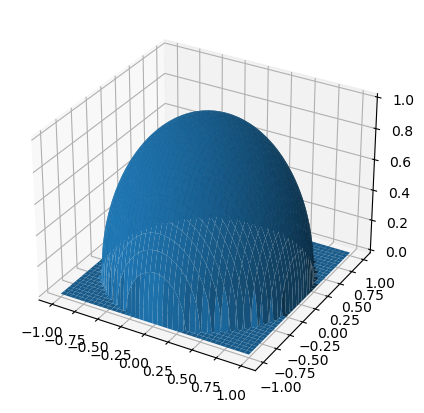

In [5]:
func = np.vectorize(func)

X,Y = np.meshgrid(x,y)
Z = func(X,Y)

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111,projection='3d')

ax.plot_surface(X, Y, Z)
ax.view_init()

## Problema 17

Para este problema representemos la integral de cuerpo negro de la forma
$$\int_0^\infty e^{-x}\frac{x^3}{(1-e^{-x})}dx=\frac{\pi^4}{15}$$
para poder realizar una cuadratura de Gauss-Laguerre de orden 3,
pues debe tener la forma
$$\int_0^\infty e^{-x}f(x)dx=\sum_{i=1}^N w_if(x_i).$$

In [6]:
N = 3
roots, weights = np.polynomial.laguerre.laggauss(3)
roots, weights

(array([0.41577456, 2.29428036, 6.28994508]),
 array([0.71109301, 0.27851773, 0.01038926]))

In [7]:
def func(x):
    return (x**3/(1-sym.exp(-x)))

I = 0

for i in range(len(weights)):
    I+=weights[i]*func(roots[i])

I

6.48113017154003

<function matplotlib.pyplot.show(close=None, block=None)>

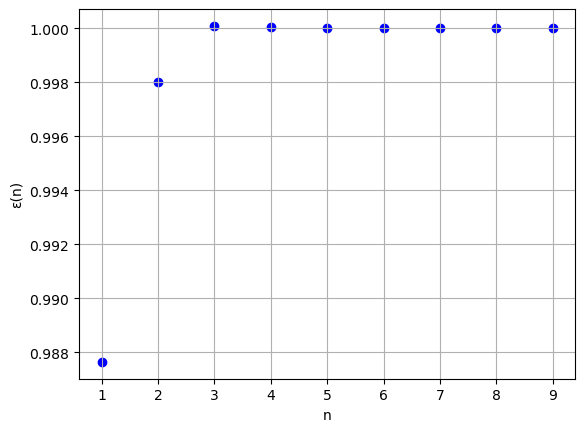

In [18]:
for n in range(1,10):
    I = 0
    Integrals = []
    roots, weights = np.polynomial.laguerre.laggauss(n+1)
    for i in range(len(weights)):
        I+=weights[i]*func(roots[i])
    #Integrals.append(I)
    plt.scatter(i, I/(np.pi**4/15), color='blue')

    
plt.xlabel('n')       
plt.ylabel('ε(n)')       
plt.grid()
plt.show

## Problema 18


In [112]:
x = sym.Symbol('x', real = True)
y = sym.Symbol('y', real = True)
N = 20

def GetHermite(n, x, y):
    # donde n es el grado del polinomio (formula Rodrigues)
    y = sym.exp(-x**2)
    poly = sym.diff(y,x,n)*((-1)**n)*sym.exp(x**2)
    return poly

Hermite = []
DHermite = []

#sacar n polinomios de legendre (en este caso se definió n=8)
for i in range(N+1):
    Poly = GetHermite(i, x, y)
    Hermite.append(Poly)
    DHermite.append(sym.diff(Poly,x,1))
    

<function matplotlib.pyplot.show(close=None, block=None)>

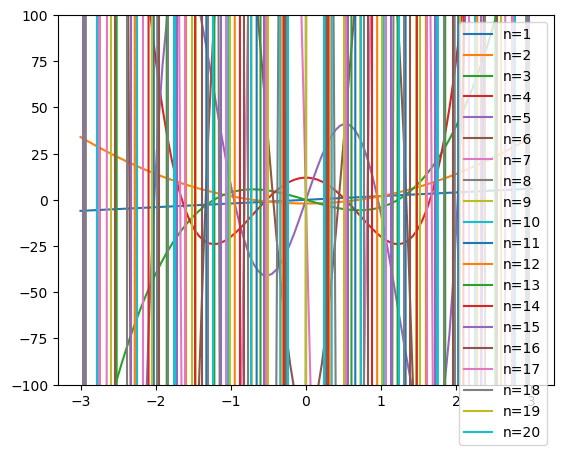

In [113]:
_x = np.linspace(-3, 3, 100)


for i, p in enumerate(Hermite):
    if i!=0:
        pn = sym.lambdify([x], p , 'numpy')
        lbel = str(i)
        plt.plot(_x, pn(_x), label= 'n='+lbel )

plt.ylim(-100, 100)        
plt.legend()
plt.show

In [114]:
def GetNewton(f,df,xn,itmax=10000,precision=1e-5):
    error = 1.
    it = 0
    while error >= precision and it < itmax:
        try:
            xn1 = xn - f(xn)/df(xn)
            error = np.abs(f(xn)/df(xn))   
        except ZeroDivisionError:
            print('Zero Division')
            
        xn = xn1
        it += 1    
    if it == itmax:
        return False
    else:
        return xn
    
def GetRoots(f,df,x,tolerancia = 5):
    Roots = np.array([])
    for i in x:
        root = GetNewton(f,df,i)
        if root != False:
            croot = np.round( root, tolerancia )
            if croot not in Roots:
                Roots = np.append(Roots, croot)    
    Roots.sort()
    return Roots

def GetAllRoots(n,xn,Hermite,DHermite):
    
    poly = sym.lambdify([x],Hermite[n],'numpy')
    Dpoly = sym.lambdify([x],DHermite[n],'numpy')
    Roots = GetRoots(poly,Dpoly,xn)
    
    return Roots

In [115]:
# Scan
xn = np.linspace(-6,6,100)

Roots = (GetAllRoots(N,xn,Hermite,DHermite))
Roots

array([-5.38748, -4.60368, -3.94476, -3.34785, -2.78881, -2.25497,
       -1.73854, -1.23408, -0.73747, -0.24534,  0.24534,  0.73747,
        1.23408,  1.73854,  2.25497,  2.78881,  3.34785,  3.94476,
        4.60368,  5.38748])

In [116]:
#Verificación

roots, weights = np.polynomial.hermite.hermgauss(N)

In [118]:
def GetWeights(Roots,Hermite,n):
    Weights=[]
    x = sym.Symbol('x')
    Hermiten1 = sym.lambdify([x],Hermite[n-1],'numpy')
    for i in range(len(roots)):
        Weights.append(2**(n-1)*np.math.factorial(n)*np.sqrt(np.pi)/(n**2*Hermiten1(Roots[i])**2))
    return Weights

Weights = GetWeights(Roots,Hermite,N)
Weights

[2.2294364050542311e-13,
 4.3995394424104e-10,
 1.0861386097175797e-07,
 7.803033732844373e-06,
 0.00022832859652385207,
 0.0032438904414475635,
 0.024810126153044423,
 0.10901516944303262,
 0.2866786586230693,
 0.4622439909151916,
 0.4622439909151916,
 0.2866786586230693,
 0.10901516944303262,
 0.024810126153044423,
 0.0032438904414475635,
 0.00022832859652385207,
 7.803033732844373e-06,
 1.0861386097175797e-07,
 4.3995394424104e-10,
 2.2294364050542311e-13]

In [79]:
def psi(x, n=1):
    Poly1 = 2*x
    c = (1/np.sqrt((2**n)*np.math.factorial(n)))*np.pi**(-1/4)
    #(sym.exp(-1*x**2 /2))*
    return c*(sym.exp(-1*x**2 /2))*Poly1

def f(x):
    return psi(x)**2 * x**2 /(sym.exp(-1*x**2))
f(x)

1.12837916709551*x**4

In [119]:
I = 0

for i in range(len(weights)):
    I+=Weights[i]*f(Roots[i])

I

1.49999350967038